In [19]:
import pandas as pd
import numpy as np 
import os
import matplotlib.pyplot as plt


%load_ext autoreload
%autoreload 2

VAL_DIR = os.path.join('..', 'data', 'validation')

In [17]:
gtdb_results_df = pd.read_csv(os.path.join(VAL_DIR, 'bac120_proteins_r207_subset_max_length_2000_predictions.csv'), index_col=0)
# In reading and writing the GTDB data, the partial column got converted back to a float, where it should be a string. 
partial = pd.read_csv(os.path.join(VAL_DIR, 'bac120_proteins_r207_subset_max_length_2000.csv'), index_col=0, usecols=['gene_id', 'partial'], dtype={'partial':str})
gtdb_results_df = gtdb_results_df.drop(columns='partial').merge(partial, left_index=True, right_index=True)

In [28]:
print('Fraction of predicted selenoproteins in GTDB subset:', gtdb_results_df.prediction.sum() / len(gtdb_results_df))

Fraction of predicted selenoproteins in GTDB subset: 0.05751118966377822


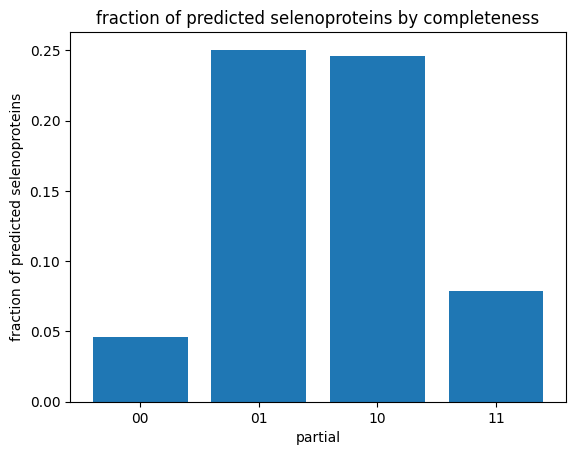

In [27]:
# I am curious if partial sequences are predicted to be truncated with higher frequency than non-partial... 
fig, ax = plt.subplots()

labels, values = [], []
for label, df in gtdb_results_df.groupby('partial'):
    labels.append(label)
    values.append(df.prediction.sum() / len(df))

ax.bar([1, 2, 3, 4], values)
ax.set_xticks([1, 2, 3, 4])
ax.set_xticklabels(labels)

ax.set_xlabel('partial')
ax.set_ylabel('fraction of predicted selenoproteins')
ax.set_title('fraction of predicted selenoproteins by completeness')
plt.show()

In [ ]:
# Going to go ahead and only focus on the complete sequences... 
gtdb_results_df = gtdb_results_df[gtdb_results_df.partial == '00']
print('Number of predicted selenoproteins:', gtdb_results_df.prediction.sum())
# These numbers are skewed slightly because I am only looking at sequences less than 2000 amino acids in length. 
print('Number of total sequences:', len(gtdb_results_df))
print('Average number of sequences per genome:', int(np.mean(gtdb_results_df.groupby('genome_id').apply(len, include_groups=False))))
print('Fraction of predicted selenoproteins in GTDB subset:', gtdb_results_df.prediction.sum() / len(gtdb_results_df))

Number of predicted selenoproteins: 21202
Number of total sequences: 460727
Average number of sequences per genome: 2726
Fraction of predicted selenoproteins in GTDB subset: 0.04601857499126381


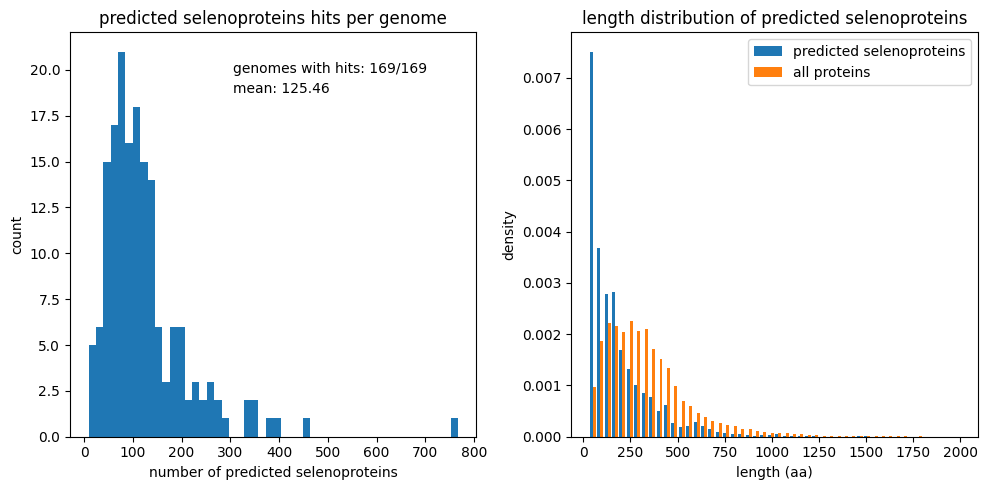

In [53]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 5))

hits = gtdb_results_df[gtdb_results_df.prediction == 1].groupby('genome_id').apply(len, include_groups=False) 
# background = gtdb_results_df.groupby('genome_id').apply(len, include_groups=False)

# axes[0].hist((hits, background), bins=50)
axes[0].hist(hits, bins=50)
axes[0].set_xlabel('number of predicted selenoproteins')
axes[0].set_ylabel('count')
axes[0].set_title('predicted selenoproteins hits per genome')

n_genomes = len(gtdb_results_df.genome_id.unique())
n_genomes_with_hits = len(gtdb_results_df[gtdb_results_df.prediction == 1].genome_id.unique())
axes[0].text(0.4, 0.9, f'genomes with hits: {n_genomes_with_hits}/{n_genomes}', horizontalalignment='left', transform=axes[0].transAxes)
axes[0].text(0.4, 0.85, f'mean: {np.round(np.mean(hits), 2)}', horizontalalignment='left', transform=axes[0].transAxes)

hits = gtdb_results_df[gtdb_results_df.prediction == 1].length
background = gtdb_results_df.length

axes[1].hist((hits, background), bins=50, density=True)
axes[1].set_xlabel('length (aa)')
axes[1].set_ylabel('density')
axes[1].set_title('length distribution of predicted selenoproteins')
axes[1].legend(['predicted selenoproteins', 'all proteins'])

plt.tight_layout()
plt.show()